## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [24]:
# you code here
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import random

#模拟数据
#num为初始化的条数
def iniinitlinerdata(num):
    def assmuing_function(paramx):
        return -20 * paramx + 5 + random.randint(-5, 5)

    random_data = np.random.random((num,1))
    x = random_data[:,0]#转换成一维数组
    #print(x)
    y = [assmuing_function(i) for i in x]

    return x,y

#使用scikit-learning进行线性回归
def linearreg(x,y):
    r = LinearRegression().fit(x.reshape(-1, 1), y)
    drawdot(x,y)#画点图
    drawline(x,r)#画点图
    return r

#画图
def drawdot(x,y,coler = 'yellow'):
    plt.scatter(x, y, c=coler)

def drawline(x,r):
    def f(x,r): 
        return r.coef_ * x + r.intercept_
    plt.plot(x, f(x,r), color='orange')

#预测
def linerregpredict(x,r):
    predicty = r.predict([[x]])
    plt.scatter(x,predicty,c='green')
    return predicty

In [25]:
#init linerreg data
X,Y = iniinitlinerdata(num = 50)

array([-6.47878689])

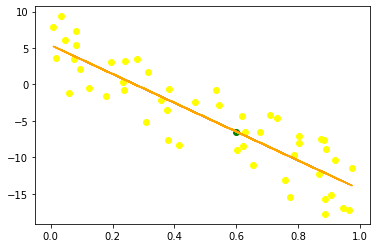

In [26]:
#线性回归
reg = linearreg(X,Y)
#初始点-黄色
#线性回归-橘色

#预测-绿色
linerregpredict(0.6,reg)

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

## cosine = 1 - $\frac{u \cdot v} {||u||_2 ||v||_2}$

In [27]:
# you code here
from scipy.spatial.distance import cosine

def knnmodel(x,y):
    return [(xi, yi) for xi, yi in zip(x, y)]

def distance(x1, x2):
    return cosine(x1, x2)

def knnpredict(predictx,x = X, y = Y, k=5):
    most_similars = sorted(knnmodel(x, y), key=lambda xi: distance(xi[0], predictx))[:k]
    
    y_hats = [_y for x, _y in most_similars]
    predicty = np.mean(y_hats)
    drawdot(predictx,predicty,coler = 'green')
    return predicty

-8.90919768212455

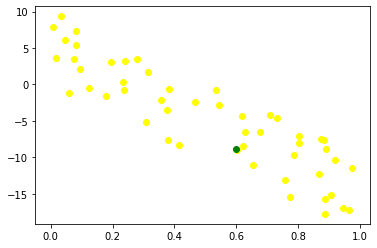

In [28]:
#画图
drawdot(X,Y)

#KNN预测
knnpredict(0.6)

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$

In [95]:
#使用课堂数据测试，完后使用新数据
import pandas as pd
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [96]:
dataset = pd.DataFrame.from_dict(mock_data)

In [97]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [98]:
# you code here
import numpy as np
from icecream import ic
from collections import Counter

#信息熵
def entropy(elements):
    counter = Counter(elements)
    #计算每个set的概率
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log(p) for p in probs)

#找到信息熵最小的列
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        #ic(f)
        values = set(training_data[f])
        #ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            #ic(sub_spliter_1)

            entropy_1 = entropy(sub_spliter_1)
            #ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            #ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
            #ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            #ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v , min_entropy)
    
    #print('spliter is: {}'.format(spliter))
    #print('the min entropy is: {}'.format(min_entropy))
    return spliter

def getdecisiontree(training_data: pd.DataFrame, target: str, printprocess = True):
    decisiontree = {}

    while 1 > 0:
        #查找
        (key, value, entropy) = find_the_optimal_spilter(training_data=training_data, target=target)
        decisiontree[key] = value
        #信息熵为0直接返回，找到最优解
        if(entropy == 0):
            break

        #获取新的dataset
        training_data = training_data[training_data[key] != value]
        #移除已经计算的列
        training_data = training_data.drop([key],axis=1)

        #如果已经没有可以移除的列，则跳出(此处判断需要排除target列))
        if len(training_data.columns) == 1:
            break
        #如果没有可用数据跳出循环
        if training_data.shape[0] == 0:
            break

    #是否打印决策过程         
    if printprocess:
        i = 0
        for k,v in decisiontree.items():
            i += 1
            print('第{0}次使用列 "{1}" = {2} 进行分割。'.format(i,k,v))
    return decisiontree

In [99]:
getdecisiontree(training_data=dataset, target='bought')

第1次使用列 "income" = -10 进行分割。
第2次使用列 "family_number" = 2 进行分割。
第3次使用列 "gender" = M 进行分割。


{'income': '-10', 'family_number': 2, 'gender': 'M'}

In [100]:
#创建新的数据源
mock_data1 = {
    'gender':['M', 'F', 'M', 'F', 'M', 'F', 'M'],
    '穿名牌': ['-10', '+10', '-10', '+10', '+10', '+10', '+10'],
    '成绩好': [1, 1, 0, 1, 1, 1, 0],
    '写作业': [1, 0, 0, 1, 0, 1, 0],
    '爱运动': [1, 0, 1, 1, 1, 0, 1],
    '上清华': [1, 0, 1, 0, 1, 1, 0],
}
ds = pd.DataFrame.from_dict(mock_data1)

In [101]:
ds

,gender,穿名牌,成绩好,写作业,爱运动,上清华
0,M,-10,1,1,1,1
1,F,+10,1,0,0,0
2,M,-10,0,0,1,1
3,F,+10,1,1,1,0
4,M,+10,1,0,1,1
5,F,+10,1,1,0,1
6,M,+10,0,0,1,0


In [102]:
getdecisiontree(training_data=ds, target='上清华')

第1次使用列 "穿名牌" = -10 进行分割。
第2次使用列 "成绩好" = 1 进行分割。
第3次使用列 "爱运动" = 1 进行分割。


{'穿名牌': '-10', '成绩好': 1, '爱运动': 1}

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [103]:
# you code here
from sklearn.cluster import KMeans
from collections import defaultdict

#kmeans
#修复了课堂上中心点与其他点颜色不一致的bug
def kmeansfit(types:int):
    if types > 8:
        raise RuntimeError('由于颜色原因支持8种分类')

    #初始化训练数据
    tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]
    cluster = KMeans(n_clusters=types, max_iter=500).fit(tranning_data)

    dots = []

    #把所有点存入变量
    for label, location in zip(cluster.labels_, tranning_data):
        dots.append((location,label))

    color = ['red', 'green', 'grey', 'black', 'yellow', 'orange', 'blue', 'pink']

    #画出所有点
    for i in range(len(dots)):
        plt.scatter(*dots[i][0], c=color[dots[i][1]])

    #画出中心点，中心点比其他点要大
    for i in range(len(cluster.cluster_centers_)):
        plt.scatter(*cluster.cluster_centers_[i], s=200, c=color[i])

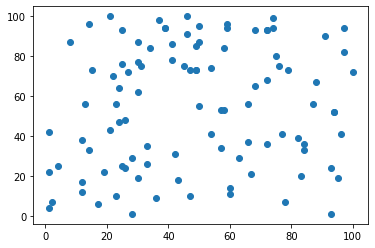

In [104]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]
plt.scatter(X1, X2)

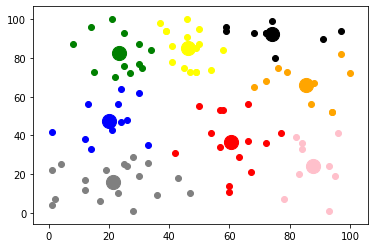

In [105]:
kmeansfit(types = 8)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:

1. 模型是建立特征值和结果的一种映射关系，即在模型中输入特征值，可以直观的看到想要的结果

2. 模型只能解决某种特定的问题，所以说有一些是有用的，从宏观角度看，一个模型并不能解决所有的问题，所以所有的模型都是错的

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:

1. overfitting指在模型训练中，完全拟合了所有的数据，包括异常值。underfitting指，模型选取或者训练能力不足，没有拟合大部分数据
2. overfitting原因：拟合了部分异常值，模型选取问题。underfitting原因：模型选取有问题、训练能力不足，训练方法有问题

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

accuracy：准确率=预测正确的个数/总预测个数。用于判断模型能否正确输出结果

precision：精确度=所有说'是'并且预测正确的个数/所有说'是'的预测个数。用于考察模型找到的结果是否准确

recall：召回率=所有说'是'并且预测正确的个数/所有标签为'是'的个数。用于考察模型能否找到正确的结果

AUC：用于检测模型在各个阈值时对结果的影响，低阈值时结果越大表明模型越灵敏。

F1score=(2 \* precision \* recall)/(precision + recall)，用于平衡precision和recall,值越大说明模型的平衡度越好

F2score=(1 + 4) \* (precision \* recall)/(4 \* precision + recall)，模型如果要求召回率的权重高于精确率，使用F2选取结果大的模型

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: 给机器设定计算学习的初始步骤，利用计算机运算速度快的优势，通过多次循环该步骤得到想要的结果，类似于人类在学习的过程中，先学习一个简单的方法，然后不停的重复该方法以获取新的知识。传统的编程在出现新的数据或者新的条件时不能自动的适应新的环境，需要进行大量的修改代码适应新环境。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Ans:这句话是对的。现在在解决某些问题上已经有很多成熟的模型，如果选取了多个模型但没有一定的评价标准，就无法得知想要解决的问题应该使用哪种模型，所以说正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [107]:
# you code here
decisiontree = getdecisiontree(training_data=dataset, target='bought',printprocess = True)

def decisiontreepredicate(gender,income,family_number,dcsntr = decisiontree):
    ret = 0
    userdict = {}
    userdict['gender']= gender
    userdict['income'] = income
    userdict['family_number'] = family_number

    for k,v in dcsntr.items():
        if dcsntr[k] == userdict[k] :
            ret = 1
            break

    if ret == 0:
        print('性别：{0} 收入：{1} 家庭成员：{2}人 的用户 --> 大概率不会购买此类产品！'.format(gender,income,family_number))
    else:
        print('性别：{0} 收入：{1} 家庭成员：{2}人 的用户 --> 大概率会购买此类产品！'.format(gender,income,family_number))

    return ret

第1次使用列 "income" = -10 进行分割。
第2次使用列 "family_number" = 2 进行分割。
第3次使用列 "gender" = M 进行分割。


In [108]:
#test
ret1 = decisiontreepredicate('M','-10',1)
ret2 = decisiontreepredicate('F','10',1)
ret3 = decisiontreepredicate('F','10',2)
ret3 = decisiontreepredicate('M','1',5)

性别：M 收入：-10 家庭成员：1人 的用户 --> 大概率会购买此类产品！
性别：F 收入：10 家庭成员：1人 的用户 --> 大概率不会购买此类产品！
性别：F 收入：10 家庭成员：2人 的用户 --> 大概率会购买此类产品！
性别：M 收入：1 家庭成员：5人 的用户 --> 大概率会购买此类产品！


<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

$$ y = k*x + b$$

$$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$
$$ \frac{\partial{loss}}{\partial{k}} = \frac{\partial{loss}}{\partial{y}} * \frac{\partial{y}}{\partial{k}} $$
$$ \frac{\partial{loss}}{\partial{b}} = \frac{\partial{loss}}{\partial{y}} * \frac{\partial{y}}{\partial{b}} $$
$$ y_i > \hat{y_i}$$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{1}{n}\sum 1 $$

$$ y_i < \hat{y_i}$$
$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}\sum 1 $$

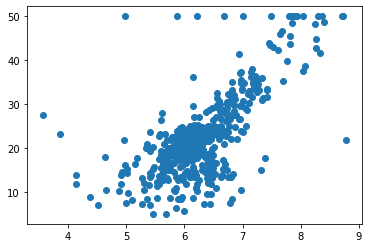

In [1]:
#init data
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt

dataset = load_boston()
X_rm =dataset['data'][:,5]#二维数组取所有元素中的第5+1个
y = dataset['target']
plt.scatter(X_rm,y)

In [6]:
# you code here
import random

#price
def price(x,k,b):
    return k * x + b

#loss
def loss(y,y_hat):
    lossret = 0
    for y_i,y_hat_i in zip(y,y_hat):
        if y_i >= y_hat_i :
            lossret += (y_i - y_hat_i) / len(list(y))
        else :
            lossret += (y_hat_i - y_i) / len(list(y))
    return lossret

# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i >= y_hat_i:
            gradient += -1 * x_i
        else :
            gradient += 1 * x_i
    return 1/n * gradient

def partial_derivative_b(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i >= y_hat_i:
            gradient += -1
        else :
            gradient += 1
    return 1 / n * gradient

#get best k & b
def getbest_k_and_b(loop_num = 200, printprocess= True):

    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    learning_rate = 1e-2
    losses = []
    current_price = []
    for i in range(loop_num):
        current_price = [price(x,k,b) for x in X_rm]
        currentloss = loss(y,current_price)
        losses.append(currentloss)
        if printprocess:
            #print(current_price)
            print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,currentloss,k,b))

        k_gradient = partial_derivative_k(X_rm,y,current_price)
        b_gradient = partial_derivative_b(X_rm,y,current_price)
        k = k + (-1 * k_gradient) * learning_rate
        b = b + (-1 * b_gradient) * learning_rate

        if printprocess:
            print("k_gradient is {}, b_gradient is {}".format(k_gradient,b_gradient))

    return (k,b,current_price,losses)

In [22]:
best_k,best_b,cur_price,cur_loss = getbest_k_and_b(200)

s -15.945929306724585 and b is 81.92260007478512
k_gradient is -6.216796442687756, b_gradient is -0.9841897233201581
Iteration 88, the loss is 40.47781831746921, parameters k is -15.883761342297706 and b is 81.93244197201832
k_gradient is -6.216796442687756, b_gradient is -0.9841897233201581
Iteration 89, the loss is 40.08164644325615, parameters k is -15.821593377870828 and b is 81.94228386925153
k_gradient is -6.216796442687756, b_gradient is -0.9841897233201581
Iteration 90, the loss is 39.68547456904314, parameters k is -15.75942541344395 and b is 81.95212576648473
k_gradient is -6.216796442687756, b_gradient is -0.9841897233201581
Iteration 91, the loss is 39.289302694830056, parameters k is -15.697257449017071 and b is 81.96196766371793
k_gradient is -6.216796442687756, b_gradient is -0.9841897233201581
Iteration 92, the loss is 38.893130820617024, parameters k is -15.635089484590193 and b is 81.97180956095113
k_gradient is -6.216796442687756, b_gradient is -0.9841897233201581
It

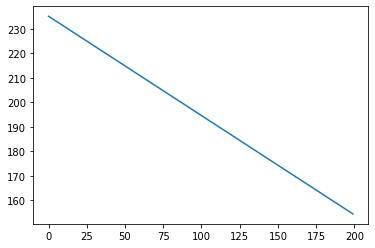

In [19]:
plt.plot(list(range(len(cur_loss))),cur_loss)

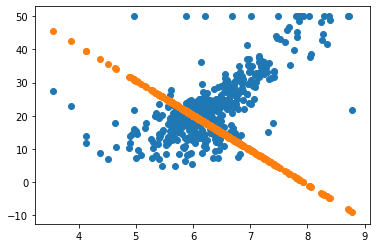

In [23]:
plt.scatter(X_rm,y)
plt.scatter(X_rm,cur_price)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)